# **Biblioteki**

In [1]:
import pingouin as pg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
import sklearn
import warnings
import scipy
from scipy import stats
from scipy.stats import yeojohnson
from scipy.stats import bartlett
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sa
from statsmodels.stats.oneway import effectsize_oneway
from statsmodels.stats.power import FTestAnovaPower
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from pingouin import kruskal, read_dataset
import scikit_posthocs as sp


# **Przygotowanie danych**

In [2]:
# Wczytanie danych

df = pd.read_csv('egzaminy.csv')
df

,Matematyka,Angielski,Fizyka,Geografia,Biologia,Chemia
0,3.761200,3.784190,4.007333,4.077537,3.850148,4.094345
1,3.850148,3.988984,4.060443,3.988984,4.007333,4.043051
2,3.761200,4.077537,4.043051,4.043051,4.007333,3.761200
3,3.828641,4.025352,3.891820,3.988984,3.931826,3.871201
4,4.094345,3.951244,3.688879,4.060443,4.025352,3.988984
...,...,...,...,...,...,...
995,4.060443,3.850148,4.077537,4.219508,4.007333,4.043051
996,3.871201,3.871201,3.951244,4.174387,3.850148,3.871201
997,3.891820,3.891820,4.127134,3.931826,3.931826,4.060443
998,3.891820,3.931826,3.931826,4.158883,4.094345,4.025352


C:\Users\j.mazur\AppData\Local\Temp\ipykernel_33844\3976683680.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'Matematyka'}>,
        <Axes: title={'center': 'Angielski'}>],
       [<Axes: title={'center': 'Fizyka'}>,
        <Axes: title={'center': 'Geografia'}>],
       [<Axes: title={'center': 'Biologia'}>,
        <Axes: title={'center': 'Chemia'}>]], dtype=object)

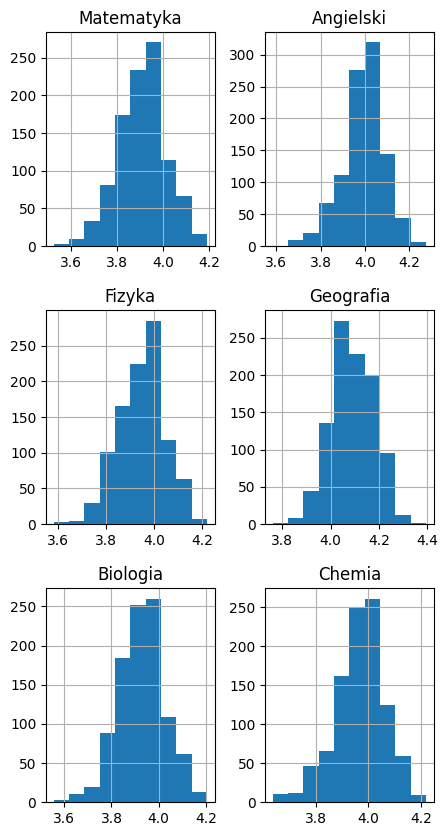

In [3]:
# Narysowanie histogramów
fig = plt.figure(figsize = (5,10))
ax = fig.gca()
df.hist(ax = ax)

In [4]:
# Przypisanie zmiennych

mat = df['Matematyka']
ang = df['Angielski']
fiz = df['Fizyka']
geo = df['Geografia']
bio = df['Biologia']
chem = df['Chemia']

In [5]:
# Przygotowanie tabeli przestawnej
df1 = pd.melt(df, value_vars=['Matematyka',	'Angielski',	'Fizyka',	'Geografia',	'Biologia',	'Chemia'])
df1 = df1.rename(columns={"variable": "group", "value": "score"})

In [6]:
# Wyznaczenie podstawowych statystyk

statystyki = df1.groupby('group')['score'].agg(['mean',  'median', 'std',  'skew', 'count']).round(2)
statystyki

,mean,median,std,skew,count
group,,,,,
Angielski,3.99,4.01,0.10,-0.46,1000
Biologia,3.93,3.93,0.10,-0.18,1000
Chemia,3.97,3.97,0.10,-0.36,1000
Fizyka,3.95,3.95,0.10,-0.27,1000
Geografia,4.09,4.09,0.09,-0.19,1000
Matematyka,3.91,3.91,0.10,-0.25,1000


# **ANOVA**

**1) ANOVA TEST**

**ANALIZA WARIANCJI ANOVA (Analysis of Variance)**

**H0:** m1=m2=m3=m4=m5=m6

Wszystkie średnie są sobie równe.

**H1:** mi=/=mj

Średnie dla conajmniej jednej pary z sześciu grup są różne.

Jest to powszechnie stosowana metoda statystyczna  pozwalająca na ocenę istotności różnic wielu średnich z prób pochodzących z wielu populacji (grup).

Celem analizy wariancji (Anova) jest zbadanie czy **dane pochodzące z kilku grup mają tą samą średnią.**

**Wykonujac anovę zawsze należy wypisać założenia, H0 i H1 oraz przeprowadzić interpretację wyników.**

Podstawowe założenia testów ANOVA.

1. Mierzalność analizowanych zmiennych.

2. Niezależność zmiennych losowych w rozważanych populacjach (grupach).

3. Równoliczność wszystkich analizowanych grup.

4. Normalność rozkładu zmiennych w każdej populacji (grupie).

5. Jednorodność wariancji.

**2) Test Welcha**

Test Welcha to wariant Anovy, który jest stosowany, gdy założenie o jednorodności wariancji nie jest spełnione. Wszystkie inne założenia zwykłej Anovy i testu Welcha są takie same i należy je sprawdzić przed wykonaniem analizy. Hipotezy są takie same jak w przypadku ANOVY.

**3) Test Kruskala-Wallisa**

Test H Kruskala-Wallisa test Kruskala-Wallisa porównuje każdą z obserwacji względem mediany (a mówiąc precyzyjniej (matematycznie) porównuje sumy rang a nie średnie lub wariancje); dlatego przy raportowaniu jego wyników warto zwrócić uwagę na wartość mediany we wszystkich grupach i na tej podstawie wyciągnąć wnioski, a nie porównując średnie. Jest to nieparametryczna wersja ANOVA. Test działa na 2 lub więcej niezależnych próbkach, które mogą mieć różne rozmiary, a rozkłady nie muszą być normalne.

**H0:** Wszystkie próbki pochodzą z tego samego rozkładu,

**H1:** Nie wszystkie próbki pochodzą z tego samego rozkładu.

Pierwsze dwa założenia powinny być spełnione w każdym wariancie testu ANOVA - wyniki egzaminów są mierzalne i niezależne. Założenie o równoliczności grup również zostało spełnione. Teraz należy sprawdzić pozostałe dwa założenia.  

**Sprawdzenie normalności rozkładów**

Do sprawdzenia normalności rozkładów można wykorzystać funkcję:

pg.normality(dane, group = 'grupy', dv = 'wynik')

Funkcja ta wykorzystuje test Shapiro-Wilka - jeden z najśilniejszych testów do badania normalności rozkładów.

**Proszę sformułować hipotezy i skomentować wynik.**

**H0:** Rozkłąd jest normalny

**H1:** Rozkład nie jest normalny

pval < 0.05, czyli odrzucamy H0 czyli rozkład nie jest normalny

In [21]:
pg.normality(df1, group = 'group', dv = 'score')

,W,pval,normal
group,,,
Matematyka,0.992778,8.671023e-05,False
Angielski,0.983633,3.718379e-09,False
Fizyka,0.990696,5.880887e-06,False
Geografia,0.994492,1.021544e-03,False
Biologia,0.992880,9.975582e-05,False
Chemia,0.988077,2.921289e-07,False


**ODP:**

**Jednorodnoć wariancji**

Hipotezy:

**H0:** Wariancje we wszystkich grupach są sobie równe.

**H1:** Wariancje dla conajmniej jednej pary wykonanych serii prób są różne: sigma_i =/= sigma_j

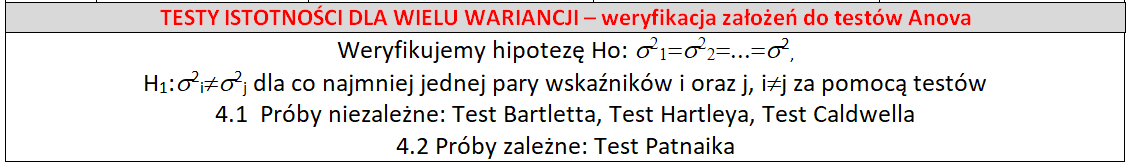

Założeniem tego testu jest normalność rozkładów, jednak z uwagi na liczebność prób pomijamy to założenie i wykonujemy test.

In [22]:
pg.homoscedasticity(df1, group='group', dv='score', method = 'bartlett')

,T,pval,equal_var
bartlett,26.726191,0.000064,False


**ODP:** H0 jest odrzucone, rozkłady nie są takie same

Niespełnione założenia dotyczące normalności rozkładów i jednorodności wariancji wskazują na to, że powinniśmy wykonać test Kruskala-Wallisa, ponieważ założenia do ANOVY oraz Welcha nie są spełnione.

W praktycze, gdy próba jest wystarczająco duża możemy jednak pominąć założenie dotyczące normalności rozkładów.

**Sprawdzimy jak takie podejście wpływa na wyniki.**

## **ANOVA**

Proszę uzupełnić hipotezy i przeprowadzić analizę.

**H0:** średnie są sobie równe

**H1:** conajmniej jedna średnia jest różna od pozostałych

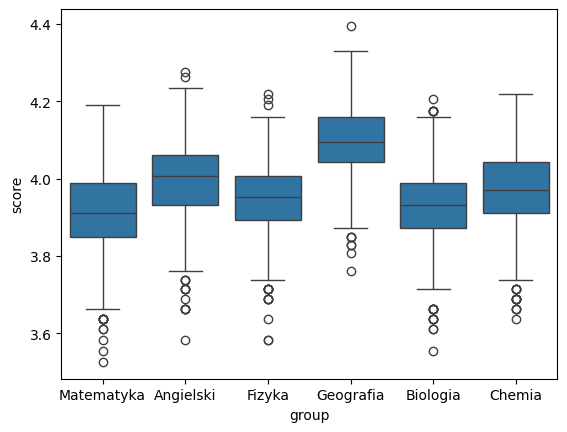

Statystyka f: stat=453.094, wartość: p=0.000000


,sum_sq,df,F,PR(>F)
C(group),20.909328,5.0,453.094126,0.0
Residual,55.322064,5994.0,NaN,NaN


In [23]:
# wykres typu boxplot
ax = sns.boxplot(x = 'group', y = 'score', data=df1)
plt.show()

# Dwa sposoby na przeprowadzenie ANOVY

# stats funkcje f_oneway pobierają grupy jako dane wejściowe i zwracają wartość ANOVA F i p

fvalue, pvalue = stats.f_oneway(mat, ang, fiz, geo, bio, chem)

print('Statystyka f: stat=%.3f, wartość: p=%3f' %(fvalue, pvalue))

# Tabela ANOVA
# Ordinary Least Squares (OLS) model
model = ols('score ~ C(group)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


**ODP:**

**TESTY POST - HOC (po fakcie)**

Analiza wariancji mówi nam o tym czy różnice w porównywanych średnich występują czy nie. **Nie wiemy jednak między którymi grupami zachodzą te ewentualne różnice.**

In [10]:
tukey = pairwise_tukeyhsd(endog=df1['score'],  groups=df1['group'], alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2   meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
Angielski   Biologia  -0.0627    0.0  -0.075 -0.0505   True
Angielski     Chemia  -0.0254    0.0 -0.0377 -0.0132   True
Angielski     Fizyka  -0.0432    0.0 -0.0554  -0.031   True
Angielski  Geografia   0.0995    0.0  0.0872  0.1117   True
Angielski Matematyka  -0.0821    0.0 -0.0943 -0.0698   True
 Biologia     Chemia   0.0373    0.0   0.025  0.0495   True
 Biologia     Fizyka   0.0195 0.0001  0.0073  0.0318   True
 Biologia  Geografia   0.1622    0.0  0.1499  0.1744   True
 Biologia Matematyka  -0.0194 0.0001 -0.0316 -0.0071   True
   Chemia     Fizyka  -0.0178 0.0005   -0.03 -0.0055   True
   Chemia  Geografia   0.1249    0.0  0.1127  0.1371   True
   Chemia Matematyka  -0.0566    0.0 -0.0689 -0.0444   True
   Fizyka  Geografia   0.1427    0.0  0.1304  0.1549   True
   Fizyka Matematyka  -0.0389    0.0 -0.

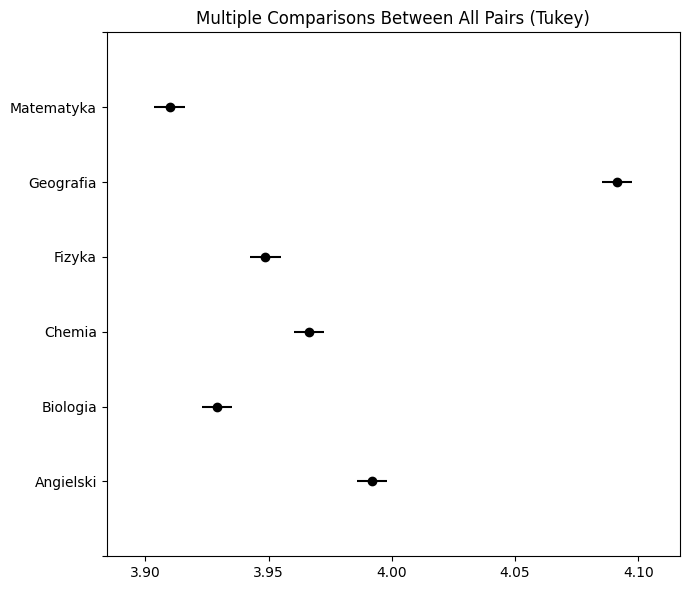

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
tukey.plot_simultaneous(ax=ax,figsize=(7, 6))
ax.vlines(x=0,ymin=-0.5,ymax=4.5, color="red")
fig.tight_layout()

**Która średnia istotnie różni sie od pozostałych? Czy jest to tylko jedna srednia czy jest ich wiecej?**

**ODP:**

**Siła efektu i moc testu**

Podstawą do odrzucenia H0 jest wartość *p*. W celu uniknięcia błędów podczas wnioskowania powinno się wziąć pod uwagę również tzw. siły efektu. Wielkość efektu szacuje w jakim stopniu efekt oddziaływania jest obecny w populacji.

Dla jednoczynnikowej ANOVY podstawową miarą siły efektu jest η^2. Możemy wyznaczyć ją bezpośrednio z wyników zawartych w tabeli ANOVA.

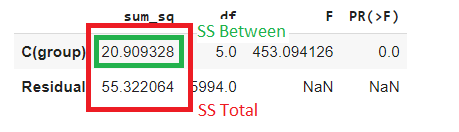

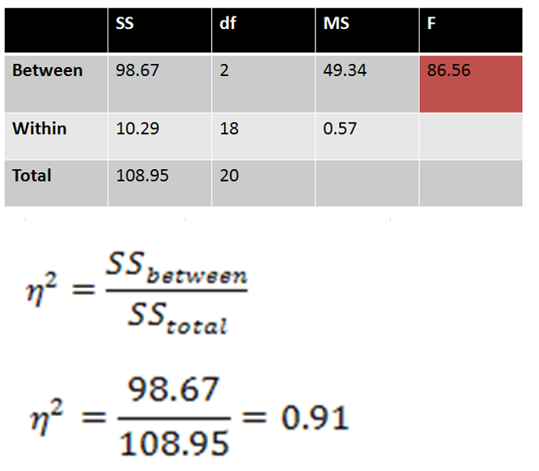

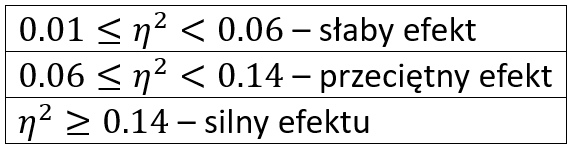

In [12]:
# wielkość efektu wyznaczona na podstawie wartości z tabeli ANOVA

eta_kw = anova_table['sum_sq'][0]/(anova_table['sum_sq'][0]+anova_table['sum_sq'][1])
print('efekt: ', eta_kw)

power = FTestAnovaPower().power(effect_size = eta_kw, nobs = 6000, alpha=0.05, k_groups=6)
print('moc testu: ', power)

efekt:  0.27428763056260635
moc testu:  1.0


C:\Users\j.mazur\AppData\Local\Temp\ipykernel_33844\3276200456.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_kw = anova_table['sum_sq'][0]/(anova_table['sum_sq'][0]+anova_table['sum_sq'][1])


Drugą wielkością siły efektu dla jednoczynnikowej ANOVY jest współczynnik f^2 D Cohena. Wielkość ta jest zależna od wartości η^2. W Pythonie możemy wykorzystać gotową funckję, która umożliwia nam wyznaczenie tej wielkości:

**effectsize_oneway**

https://www.statsmodels.org/dev/generated/statsmodels.stats.oneway.effectsize_oneway.html#statsmodels.stats.oneway.effectsize_oneway

na podstawie siły efektu wyliczyć można również moc:

**FTestAnovaPower().power()**

https://www.statsmodels.org/dev/generated/statsmodels.stats.power.FTestAnovaPower.power.html#statsmodels.stats.power.FTestAnovaPower.power


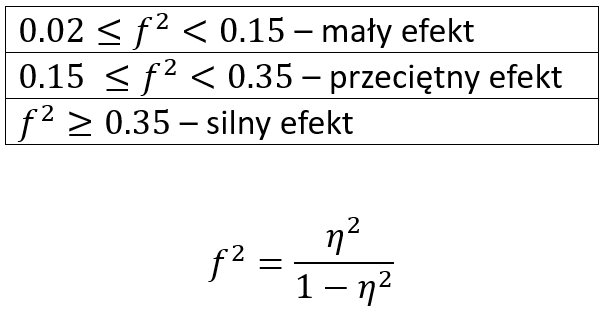

In [13]:
# Przygotowanie danych do wyznaczenia siły efektu f^2

# liczba próbek
k = [len(mat)] * 6

# średnie
m1 = np.mean(mat)
m2 = np.mean(ang)
m3 = np.mean(fiz)
m4 = np.mean(geo)
m5 = np.mean(bio)
m6 = np.mean(chem)

# odchylenie standardowe
v1 = np.var(mat)
v2 = np.var(ang)
v3 = np.var(fiz)
v4 = np.var(geo)
v5 = np.var(bio)
v6 = np.var(chem)

assumption = pd.DataFrame({'means':[m1, m2, m3, m4, m5, m6], 'variances': [v1, v2, v3, v4, v5, v6], 'n': k})


In [14]:
# wyznaczenie wielkości efektu f^2

effect = effectsize_oneway(means = assumption.means,
                  vars_ = assumption.variances,
                  nobs = assumption.n,
                  use_var = 'equal')        #  use_var = 'equal' dla ANOVY i 'unequal' dla testu Welcha

print('wielkość efektu: ',effect)

# moc testu

power = FTestAnovaPower().power(effect_size = effect**(1/2), nobs = 6000, alpha=0.05, k_groups=6)
print('moc testu: ', power)

wielkość efektu:  0.37795639445336693
moc testu:  1.0


In [15]:
# Sprawdzenie analityczne
f_kw = eta_kw/(1-eta_kw)
f_kw

0.3779563944531454

Siła efektu f^2 wyznaczona analitycznie nie różni się od siły efektu wyznaczonej przy pomocy funkcji.

**Proszę określić czy siła efektu dla testu ANOVA jest mała, przeciętna czy duża ? Jaka jest moc ?**

**ODP:**

## **WELCH**

Proszę uzupełnić hipotezy i przeprowadzić analizę.

**H0:**

**H1:**

In [16]:
pg.welch_anova(dv='score', between='group', data=df1)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,5,2796.110971,500.064261,0.0,0.274288


**ODP:**

**Test POST-HOC**

In [17]:
pg.pairwise_gameshowell(dv='score', between='group', data=df1)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Angielski,Biologia,3.991928,3.929225,0.062703,0.004314,14.534669,1997.723206,0.000000e+00,0.649766
1,Angielski,Chemia,3.991928,3.966483,0.025445,0.004307,5.907208,1997.846961,6.106562e-08,0.264079
2,Angielski,Fizyka,3.991928,3.948728,0.043200,0.004288,10.074163,1997.999937,7.623902e-13,0.450361
3,Angielski,Geografia,3.991928,4.091381,-0.099454,0.004103,-24.237510,1981.110093,5.604406e-13,-1.083527
4,Angielski,Matematyka,3.991928,3.909841,0.082087,0.004446,18.461414,1988.326434,7.120970e-13,0.825310
5,Biologia,Chemia,3.929225,3.966483,-0.037258,0.004333,-8.599028,1997.981790,1.014411e-12,-0.384416
6,Biologia,Fizyka,3.929225,3.948728,-0.019503,0.004314,-4.521262,1997.714769,9.502565e-05,-0.202121
7,Biologia,Geografia,3.929225,4.091381,-0.162156,0.004130,-39.263982,1976.624360,0.000000e+00,-1.755279
8,Biologia,Matematyka,3.929225,3.909841,0.019384,0.004471,4.335614,1991.294918,2.208016e-04,0.193822
9,Chemia,Fizyka,3.966483,3.948728,0.017755,0.004307,4.122242,1997.840670,5.572286e-04,0.184283


**Która średnia istotnie różni sie od pozostałych? Czy jest to tylko jedna srednia czy jest ich wiecej?**

**ODP:**

**Siła efektu**

Siłę efektu η^2 możemy odczytać bezpośrednio z wyników zawartych w tabeli.

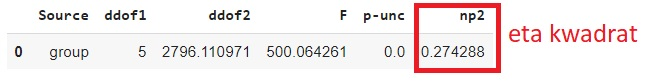

**ODP**: Wartość eta-kwadrat wynosi: .....

In [18]:
# wyznaczenie wielkości efektu f^2

effect = effectsize_oneway(means = assumption.means,
                  vars_ = assumption.variances,
                  nobs = assumption.n,
                  use_var = 'unequal')        #  use_var = 'equal' dla ANOVY i 'unequal' dla testu Welcha

print('wielkość efektu: ',effect)

# moc testu

power = FTestAnovaPower().power(effect_size = effect, nobs = 6000, alpha=0.05, k_groups=6)
print('moc testu: ', power)

wielkość efektu:  0.4175351809727454
moc testu:  1.0


**UWAGA !**

Trzeba pamiętać o tym, że w przypadku testu Welcha wielkość efektu f^2 jest zawyżona (stąd różnica między wartością otrzymaną z funckji a wynikiem obliczeń analitycznych).

In [19]:
# Sprawdzenie analityczne
f_kw = eta_kw/(1-eta_kw)
f_kw

0.3779563944531454

**Proszę określić czy siła efektu dla testu Welcha jest mała, przeciętna czy duża ? Jaka jest moc ?**

**ODP:**

**Na podstawie siły efektu proszę skomentować wyniki obu testów. Czy otrzymane wyniki różnią się od siebie?**

**KOMENTARZ:**

## **ZADANIE**

Proszę przekształcić dane tak aby spełniały kryteria normalności rozkładu (normalność należy sprawdzić). Natępnie proszę sprawdzić jednorodność wariancji, przeprowadzić test: ANOVĘ lub Welcha (zgodnie z założeniami), wyznaczyć siłę efektu oraz moc i skomentować wyniki (odnosząc się do wyników przed normalizacją).

In [31]:
# Rozwiązanie - proszę pamiętać o Hipotezach
l_Area_t_odw = 1/l_Area
print('Transformacja odwrotna')
print(stats.normaltest(l_Area_t_odw))

# Transformacja pierwiastkowa

l_Area_t_pierw = np.sqrt(l_Area)
print('Transformacja pierwiastkowa')
print(stats.normaltest(l_Area_t_pierw))

# Transformacja logarytmiczna

l_Area_t_log = np.log(l_Area)
print('Transformacja logarytmiczna')
print(stats.normaltest(l_Area_t_log))

# Transformacja wykładnicza

# sprawdzamy dla jakiego wykładnika, wartość p jest największa

p_val = []
lam = []
for i in range(1,20):
  l_Area_t_wykl = l_Area**i
  stat, p = stats.normaltest(l_Area_t_wykl)
  p_val.append(p)
  lam.append(i)

print('Transformacja wykładnicza')
max_p = max(p_val)
index = p_val.index(max_p) + 1
print('wartosc_p',max_p, ' dla wykładnika:', index)

# Transformacja Boxa-Coxa

l_Area_t_bc,lm = boxcox(l_Area)
print('Transformacja Boxa-Coxa')
print(stats.normaltest(l_Area_t_bc))

# transformacja Yeo-Johnsona

l_Area_t_yj,lm = yeojohnson(l_Area)
print('Transformacja Yeo-Johnsona')
print(stats.normaltest(l_Area_t_yj))


NameError: name 'l_Area' is not defined

In [28]:

# transformacja + sprawdzenie normalności
pg.normality(df1, group = 'group', dv = 'score')


,W,pval,normal
group,,,
age,0.925238,1.245865e-31,False
1st Flr SF,0.949702,1.061927e-26,False
Lot Frontage,0.937174,2.059339e-29,False
Lot Area,0.482896,0.000000e+00,False


In [29]:

# sprawdzenie jednorodności wariancji
pg.homoscedasticity(df1, group='group', dv='score', method = 'bartlett')


,T,pval,equal_var
bartlett,48345.411714,0.0,False


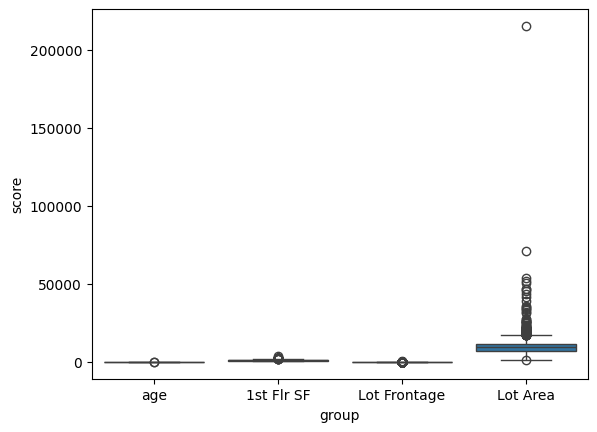

Statystyka f: stat=453.094, wartość: p=0.000000


,sum_sq,df,F,PR(>F)
C(group),1.437400e+11,3.0,4507.091074,0.0
Residual,9.261430e+10,8712.0,NaN,NaN


In [30]:

# ANOVA lub test Welcha... + test POST-HOC + siła efektu
# wykres typu boxplot
ax = sns.boxplot(x = 'group', y = 'score', data=df1)
plt.show()

# Dwa sposoby na przeprowadzenie ANOVY

# stats funkcje f_oneway pobierają grupy jako dane wejściowe i zwracają wartość ANOVA F i p

fvalue, pvalue = stats.f_oneway(mat, ang, fiz, geo, bio, chem)

print('Statystyka f: stat=%.3f, wartość: p=%3f' %(fvalue, pvalue))

# Tabela ANOVA
# Ordinary Least Squares (OLS) model
model = ols('score ~ C(group)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# Komentarz



#**Prawidłowa analiza z wykorzystaniem testu Kruskala-Wallisa**

Proszę uzupełnić hipotezy i skomentować wyniki.

**H0:**

**H1:**

In [20]:
kruskal(data=df1, dv='score', between='group')

,Source,ddof1,H,p-unc
Kruskal,group,5,1623.353869,0.0


**ODP:**

**Test POST-HOC**

In [ ]:
x = [mat, ang, fiz, geo, bio, chem]
sp.posthoc_dunn(x, p_adjust = 'holm')

,1,2,3,4,5,6
1,1.000000e+00,2.236753e-62,3.180965e-13,6.048289e-274,9.083277e-04,7.215061e-29
2,2.236753e-62,1.000000e+00,9.400645e-20,1.820018e-76,1.663278e-40,1.777054e-07
3,3.180965e-13,9.400645e-20,1.000000e+00,1.124016e-170,8.633417e-05,2.537232e-04
4,6.048289e-274,1.820018e-76,1.124016e-170,1.000000e+00,2.925056e-225,2.482699e-127
5,9.083277e-04,1.663278e-40,8.633417e-05,2.925056e-225,1.000000e+00,6.586789e-15
6,7.215061e-29,1.777054e-07,2.537232e-04,2.482699e-127,6.586789e-15,1.000000e+00


**Która średnia istotnie różni sie od pozostałych? Czy jest to tylko jedna srednia czy jest ich wiecej?**

**ODP:**

**Siła efektu:**

Siłę efektu η^2 możemy obliczyć ze wzoru:

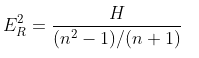

H - statystyka Kruskalla-Wallisa

n - liczba próbek

In [ ]:
eta_kw =1623.353869/(6000 - 1)
eta_kw

0.2706040788464744

**Proszę określić czy siła efektu dla testu Kruskala-Wallisa jest mała, przeciętna czy duża ?**

**ODP:**

**Czy w przypadku dużej ilości prób założenie o normalności rozkładów musi być spełnione? Na co należy zwrócić szczególną uwagę podczas takiej analizy? Czy wyniki testów POST-HOC są takie same w każdym przypadku ?**

**KOMENTARZ:**